In [325]:
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os

load_dotenv()

False

### Conectando ao Banco de dados

In [326]:
conn = f"mysql+mysqlconnector://{os.environ.get('DB_USER')}:{os.environ.get('DB_PASSWORD')}@{os.environ.get('DB_HOST')}:{os.environ.get('DB_PORT')}/{os.environ.get('DB_NAME')}"

engine = create_engine(conn)

### Executando o comando sql

In [327]:
query = "SELECT * FROM books;"
df = pd.read_sql(query, engine)



In [328]:
df

,id,title,author,price
0,1,Journey to the center of the earth,Julio Verne,13.00
1,2,Sherlock Holmes,Arthur Conan Doyle,31.00
2,3,Jungle Book,Rudyard Kipling,10.00
3,4,Death on the Nile,Agatha Christie,30.99
4,6,Pride and Prejudice,Jane Austen,15.55
5,7,Sense and Sensibility,Jane Austen,15.55
6,17,Persuasion,Jane Austen,10.50
7,18,Final Fantasy VII: On the Way to a Smile,Kazushige Nojima,30.00
8,19,The Divine Comedy,Dante Alighier,79.99
9,20,Dom Quixote,Miguel de Cervantes,40.00


### Encerrando a conexão

In [329]:
engine.dispose()

### Exibindo os livros ordenando pelo número de vendas

In [330]:
query = 'SELECT books.id, books.title, book_sells.quantity FROM books Inner Join book_sells ON books.id = book_sells.book_id ORDER BY book_sells.quantity DESC;'
df = pd.read_sql(query, engine)


In [331]:
df


,id,title,quantity
0,19,The Divine Comedy,198
1,3,Jungle Book,144
2,4,Death on the Nile,90
3,20,Dom Quixote,83
4,6,Pride and Prejudice,68
5,7,Sense and Sensibility,54
6,18,Final Fantasy VII: On the Way to a Smile,35
7,17,Persuasion,28
8,2,Sherlock Holmes,15
9,1,Journey to the center of the earth,10


In [332]:
engine.dispose()

### Exibindo os livros mais vendidos

In [333]:
query = 'SELECT books.id as book_Id, books.title, book_sells.quantity FROM books Inner Join book_sells ON books.id = book_sells.book_id WHERE (book_sells.quantity BETWEEN 80 and 200) ORDER BY book_sells.quantity DESC;'
df = pd.read_sql(query, engine)

In [334]:
df

,book_Id,title,quantity
0,19,The Divine Comedy,198
1,3,Jungle Book,144
2,4,Death on the Nile,90
3,20,Dom Quixote,83


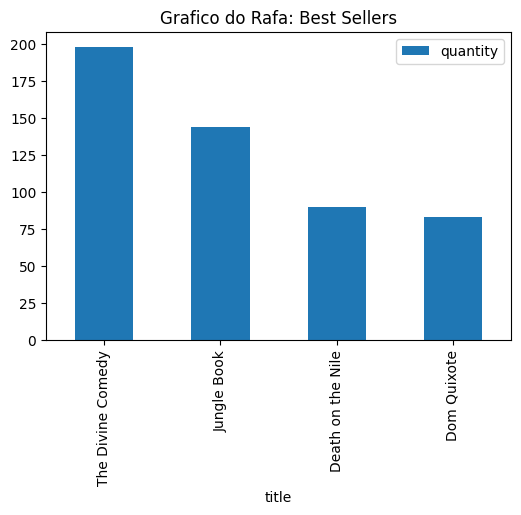

In [335]:
df.plot(kind='bar', x='title', y='quantity')
plt.title('Grafico do Rafa: Best Sellers')
plt.gcf().set_size_inches(6, 4)



In [336]:
engine.dispose()